# Autoencoders for image compression

## Convolutional autoencoders

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

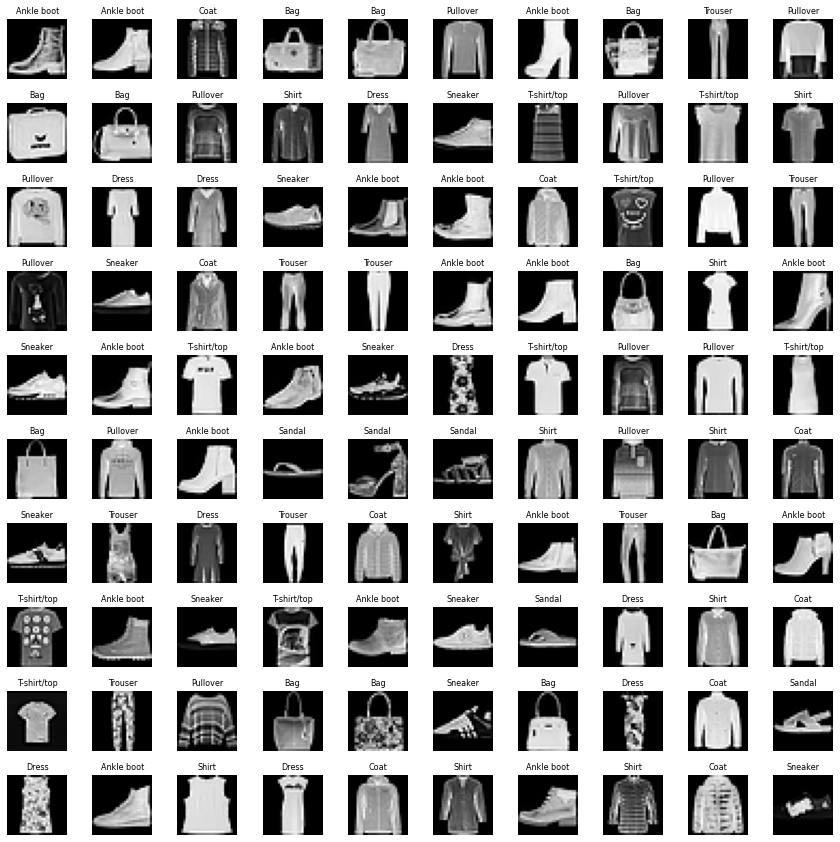

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [10]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)           0

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [11]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3116 - accuracy: 0.5032
Epoch 2/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2881 - accuracy: 0.5062
Epoch 3/50
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2841 - accuracy: 0.5068
Epoch 4/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2819 - accuracy: 0.5071
Epoch 5/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2802 - accuracy: 0.5074
Epoch 6/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2789 - accuracy: 0.5076
Epoch 7/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2779 - accuracy: 0.5077
Epoch 8/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2771 - accuracy: 0.5078
Epoch 9/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2764 - accuracy: 0.5079
Epoch 10/50
1875/1875 [==============================] - 48s 26m

### Encoding and decoding the test images

In [13]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)           0

In [15]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0     

In [16]:
coded_test_images = encoder.predict(X_test)

In [17]:
coded_test_images.shape

(10000, 128)

In [18]:
coded_test_images[0]

array([0.4119999 , 0.19437471, 0.4866152 , 0.1310238 , 0.2042903 ,
       0.3149464 , 0.16218191, 0.5688478 , 0.46700555, 0.24191448,
       0.51310325, 0.10485429, 0.230195  , 0.29477555, 0.17471683,
       0.63615334, 0.5594308 , 0.3937501 , 0.56699324, 0.        ,
       0.28769332, 0.34512752, 0.17478174, 0.6792479 , 0.67393255,
       0.32567397, 0.6186228 , 0.        , 0.15599799, 0.12438872,
       0.27053466, 0.71810573, 0.47164312, 0.31125334, 0.40824887,
       0.        , 0.38395083, 0.22328335, 0.21043766, 0.5684787 ,
       0.93469894, 0.59644735, 0.71587276, 0.        , 1.2591649 ,
       0.        , 1.1901821 , 2.2422788 , 0.3669112 , 1.5592879 ,
       1.4961169 , 0.        , 2.2210941 , 0.        , 3.1433997 ,
       2.6937602 , 0.67816037, 1.704895  , 2.3545606 , 0.        ,
       0.49218285, 0.        , 1.8266335 , 1.1884451 , 0.43886447,
       1.5173106 , 0.734918  , 0.        , 1.7071782 , 0.        ,
       2.1217523 , 2.2512822 , 0.7321168 , 2.3627212 , 1.50334

In [ ]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 28, 28, 1)

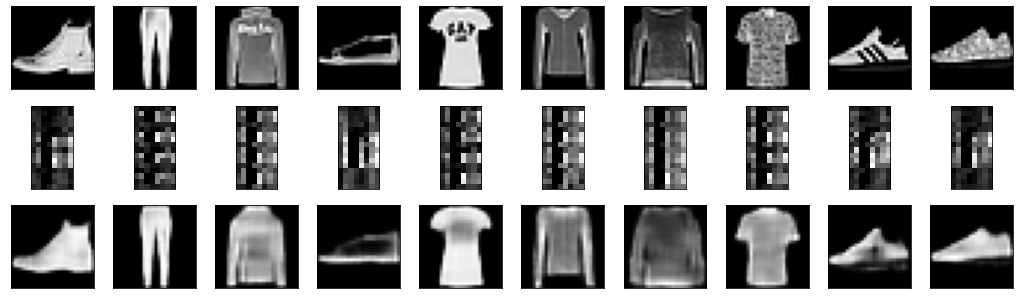

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
    # Original images
    ax = plt.subplot(10,10, i + 1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    # Coded images
    ax = plt.subplot(10,10, i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    # Decoded images
    ax = plt.subplot(10,10, i + 1 + n_images * 2)
    plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

In [ ]:
16 * 8

128